In [1]:
!git clone https://github.com/FedericoVasile1/Project8

Cloning into 'Project8'...
remote: Enumerating objects: 507, done.
remote: Counting objects: 100% (507/507), done.
remote: Compressing objects: 100% (379/379), done.
remote: Total 507 (delta 203), reused 404 (delta 107), pack-reused 0
Receiving objects: 100% (507/507), 49.72 MiB | 23.73 MiB/s, done.
Resolving deltas: 100% (203/203), done.
/content/Project8


In [2]:
%cd /content/Project8/
!pip install -r requirements.txt

/content/Project8


In [3]:
!bash download_crc_3_noisy.sh

--2021-02-22 14:11:42--  https://docs.google.com/uc?export=download&confirm=&id=1-1QvVxUSieDiz0apIHGRUr_CjngJufq6
Resolving docs.google.com (docs.google.com)... 172.217.203.139, 172.217.203.138, 172.217.203.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-5k-docs.googleusercontent.com/docs/securesc/ulpa9kkd4pjoufad9jcbpk61m677qs9v/c4h8e43omq69qomm2k8028vun4cqg48n/1614003075000/04375943831758926906/17115658515509373875Z/1-1QvVxUSieDiz0apIHGRUr_CjngJufq6?e=download [following]
--2021-02-22 14:11:43--  https://doc-04-5k-docs.googleusercontent.com/docs/securesc/ulpa9kkd4pjoufad9jcbpk61m677qs9v/c4h8e43omq69qomm2k8028vun4cqg48n/1614003075000/04375943831758926906/17115658515509373875Z/1-1QvVxUSieDiz0apIHGRUr_CjngJufq6?e=download
Resolving doc-04-5k-docs.googleusercontent.com (doc-04-5k-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connectin

In [4]:
!python src/utils/label_conversion.py

In [12]:
import os
import numpy as np
from src.utils.visualize import plot_random_images, stats_classes

# Load array images, de-normalize and de-center
X_train = np.load(os.path.join('data', 'crc_3_noisy', 'X_train.npy'))
Y_train = np.load(os.path.join('data', 'crc_3_noisy', 'real_classes_train_int.npy'))
mean_image = np.load(os.path.join('data', 'crc_3_noisy', 'mean_x_train.npy'))

X_train *= 255.
X_train[:, :, :, 0] += mean_image[0]
X_train[:, :, :, 1] += mean_image[1]
X_train[:, :, :, 2] += mean_image[2]
X_train = X_train.astype('uint8')

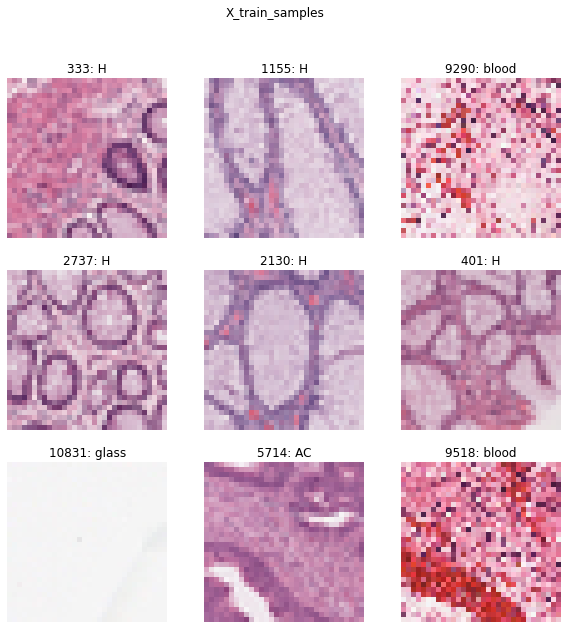

In [20]:
CLASS_INDEX = ["AC", "AD", "H", "blood", "fat", "glass", "stroma"]

# Visualize random images
#np.random.seed(5)
plot_random_images(X_train, 
                   Y_train,
                   class_index=CLASS_INDEX,
                   examples=12,
                   fig_suptitle='X_train_samples', 
                   figsize=(10, 10))

(tensor([0, 1, 2, 3, 4, 5, 6]), tensor([3000, 3000, 3000,  636,  702,  648, 1350]))


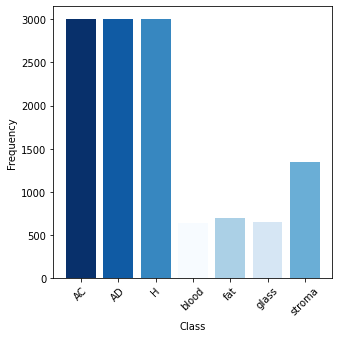

In [19]:
a = stats_classes(dataset_name='CRC', 
                  class_index=CLASS_INDEX, 
                  train=True,
                  show_image=True)